In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading the Datasets

In [2]:
df1 = pd.read_csv('data/calendar_afcs2023.csv')
sales_df = pd.read_csv('data/sell_prices_afcs2023.csv')
train_df = pd.read_csv('data/sales_train_validation_afcs2023.csv')
test_df = pd.read_csv('data/sales_test_validation_afcs2022.csv')


In [4]:
renaming = {"wm_yr_wk" : "week_id",
            "wday" : "day_id",
            "snap_TX" : "allows_snap3"
           }

df1 = df1.rename(columns = renaming)

,date,week_id,weekday,day_id,month,year,event_name_1,event_type_1,event_name_2,event_type_2,allows_snap3
0,1/29/2011,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,1/30/2011,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2,1/31/2011,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
3,2/1/2011,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1
4,2/2/2011,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1964,6/15/2016,11620,Wednesday,5,6,2016,NaN,NaN,NaN,NaN,1
1965,6/16/2016,11620,Thursday,6,6,2016,NaN,NaN,NaN,NaN,0
1966,6/17/2016,11620,Friday,7,6,2016,NaN,NaN,NaN,NaN,0
1967,6/18/2016,11621,Saturday,1,6,2016,NaN,NaN,NaN,NaN,0


In [7]:
special_dates = df1[df1['event_name_1'].notna()]["date"]

special_dates = pd.DataFrame(special_dates)

special_dates['date'] = pd.to_datetime(special_dates['date'])

In [16]:
sales_df = sales_df.rename(columns = {'wm_yr_wk' : 'week_id'})

# Creating a unified dataframe

In [21]:
sales_train = train_df

In [22]:
sales_train

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
819,FOODS_3_824_TX_3_validation,0,1,0,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
820,FOODS_3_825_TX_3_validation,0,0,0,2,1,1,0,0,1,...,1,1,1,3,1,0,0,4,2,0
821,FOODS_3_826_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,2,1,1,5,3,1,2,1,2


In [23]:
sales_train = sales_train.transpose()

In [24]:
sales_train.columns = sales_train.iloc[0]

In [25]:
sales_train = sales_train.iloc[1:]

In [26]:
date_rng = pd.date_range(start='2011-01-29', end='2016-04-24', freq='D')

sales_train.index = date_rng

In [27]:
sales_train['snap'] = 0

In [29]:
counter = 0
event1 = df1['event_name_1'][:1914]
event2 = df1['event_name_2'][:1914]
weeks = df1['week_id'][:1914]
snap = df1['allows_snap3'][:1914]

for index, row in sales_train.iterrows():
    sales_train.at[index, 'snap'] = snap.iloc[counter]
    sales_train.at[index, 'event_name_1'] = event1.iloc[counter]
    sales_train.at[index, 'event_name_2'] = event2.iloc[counter]
    sales_train.at[index, 'week_id'] = weeks.iloc[counter]
    counter += 1

In [31]:
sales_train = pd.get_dummies(sales_train, columns=['event_name_1'], prefix='event_1_')
sales_train = pd.get_dummies(sales_train, columns=['event_name_2'], prefix='event_2_')

In [33]:
counter = 0
weeks = df1['week_id'][:1914]

for index, row in sales_train.iterrows():
    sales_train.at[index, 'week_id'] = weeks.iloc[counter]
    counter += 1

In [36]:
products = []

for i in range(823):

    df_part = sales_train.iloc[:, -36:].copy()
    
    df_part[sales_train.columns[i][:11]] = sales_train.iloc[:, i]

    item = sales_train.columns[i][8:11]
    
    products.append(df_part)

In [40]:
products_all = []
for product in products:
    item = product.columns[-1]
    prices = sales_df[sales_df['item_id'] == item].drop(['store_id', 'item_id'], axis=1)
    product_new = pd.merge(product, prices, on='week_id', how='left')
    product_new.index = date_rng
    products_all.append(product_new)

In [42]:
for i, product in enumerate(products_all):
    if product.empty:
        print(i)
    else:
        product.drop(['week_id'], axis = 1, inplace=True)

## Same for the test set

In [43]:
sales_test = test_df

In [44]:
sales_test= sales_test.transpose()
sales_test.columns = sales_test.iloc[0]
sales_test = sales_test.iloc[1:]

date_rng_test = pd.date_range(start='2016-04-25', end='2016-05-22', freq='D')

sales_test.index = date_rng_test

In [45]:
counter = 0
event1 = df1['event_type_1'][1914:]
event2 = df1['event_type_2'][1914:]
weeks = df1['week_id'][1914:]
snap = df1['allows_snap3'][1914:]

for index, row in sales_test.iterrows():
    sales_test.at[index, 'snap'] = snap.iloc[counter]
    sales_test.at[index, 'event_type_1'] = event1.iloc[counter]
    sales_test.at[index, 'event_type_2'] = event2.iloc[counter]
    sales_test.at[index, 'week_id'] = weeks.iloc[counter]
    counter += 1

In [46]:
sales_test = pd.get_dummies(sales_test, columns=['event_type_1'], prefix='event_1_')
sales_test = pd.get_dummies(sales_test, columns=['event_type_2'], prefix='event_2_')

In [47]:
sales_test['event_1__National']	= 0
sales_test['event_1__Sporting'] = 0
sales_test['event_2__Cultural']	= 0
sales_test['event_2__Religious'] = 0

In [48]:
counter = 0
weeks = df1['week_id'][1914:]

for index, row in sales_test.iterrows():
    sales_test.at[index, 'week_id'] = weeks.iloc[counter]
    counter += 1

In [49]:
products_test = []

for i in range(823):

    df_part = sales_test.iloc[:, -8:].copy()
    
    df_part[sales_test.columns[i][:11]] = sales_test.iloc[:, i]

    item = sales_test.columns[i][8:11]
    
    products_test.append(df_part)

In [50]:
products_all_test = []
for product in products_test:
    item = product.columns[-1]
    prices = sales_df[sales_df['item_id'] == item].drop(['store_id', 'item_id'], axis=1)
    product_new = pd.merge(product, prices, on='week_id', how='left')
    product_new.index = date_rng_test
    products_all_test.append(product_new)

In [51]:
for i, product in enumerate(products_all_test):
    if product.empty:
        print(i)
    else:
        product.drop(['week_id'], axis = 1, inplace=True)

# Definition of Croston and Croston TSB Methods

In [53]:
def Croston_TSB(ts,extra_periods=1,alpha=0.4, beta=0.4):
    d = np.array(ts) # Transform the input into a numpy array
    cols = len(d) # Historical period length
    d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    #level (a), probability(p) and forecast (f)
    a,p,f = np.full((3,cols+extra_periods),np.nan)
# Initialization
    first_occurence = np.argmax(d[:cols]>0)
    a[0] = d[first_occurence]
    p[0] = 1/(1 + first_occurence)
    f[0] = p[0]*a[0]
                 
    # Create all the t+1 forecasts
    for t in range(0,cols): 
        if d[t] > 0:
            a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
            p[t+1] = beta*(1) + (1-beta)*p[t]  
        else:
            a[t+1] = a[t]
            p[t+1] = (1-beta)*p[t]       
        f[t+1] = p[t+1]*a[t+1]
        
    # Future Forecast
    a[cols+1:cols+extra_periods] = a[cols]
    p[cols+1:cols+extra_periods] = p[cols]
    f[cols+1:cols+extra_periods] = f[cols]
                      
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
    return f


def Croston(ts,extra_periods=1,alpha=0.4, aa=0.4):
    #print(alpha)
    d = np.array(ts) # Transform the input into a numpy array
    cols = len(d) # Historical period length
    d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    #level (a), periodicity(p) and forecast (f)
    a,p,f = np.full((3,cols+extra_periods),np.nan)
    q = 1 #periods since last demand observation
    
    # Initialization
    first_occurence = np.argmax(d[:cols]>0)
    a[0] = d[first_occurence]
    p[0] = 1 + first_occurence
    f[0] = a[0]/p[0]
    # Create all the t+1 forecasts
    for t in range(0,cols):        
        if d[t] > 0:
            a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
            p[t+1] = aa*q + (1-aa)*p[t]
            f[t+1] = a[t+1]/p[t+1]
            q = 1           
        else:
            a[t+1] = a[t]
            p[t+1] = p[t]
            f[t+1] = f[t]
            q += 1
       
    # Future Forecast 
    a[cols+1:cols+extra_periods] = a[cols]
    p[cols+1:cols+extra_periods] = p[cols]
    f[cols+1:cols+extra_periods] = f[cols]
                      
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
    return f

# Dataset creation function

In [54]:
def createFold(date_1, date_2, end_date):

    
    start_date_1 = pd.to_datetime(date_1)
    start_date_2 = pd.to_datetime(date_2)
    end_date_1  = pd.to_datetime(end_date)


    X_train = []
    y_test = []

    for product in products_all:
        x = product.iloc[:, -2].loc[:start_date_1]
        if not x.empty:
            X_train.append(x)

            y = product.iloc[:, -2].loc[start_date_2:end_date_1]
            y_test.append(y)
        else:
            X_train.append(pd.Series([]))
            y_test.append(pd.Series([]))
        
    return X_train, y_test

# Cross-Validation performing function for Croston and Croston TSB Methods

In [55]:
def runCrostonVal(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3):
    preds = []
    rmses = []
    
    a_1_rng = np.arange(0, 1.1, 0.1)
    a_2_rng = np.arange(0, 1.1, 0.1)

    alphas_1 = []
    alphas_2 = []

    for i in range(len(X_train_1)):
        best_a_1  = 0.4
        best_a_2 = 0.4
        best_rmse = np.inf
        rmse_fold_1 = []
        rmse_fold_2 = []
        rmse_fold_3 = []
        for a_1 in a_1_rng:
            for a_2 in a_2_rng:
                rm = []
                if not X_train_1[i].empty:
                    pred_1 = Croston(X_train_1[i], len(y_test_1[i]), a_1, a_2)
                    rmse_1 = np.sqrt(mean_squared_error(y_test_1[i], pred_1[-len(y_test_1[i]):]))
                    rm.append(rmse_1)
                if not X_train_2[i].empty:
                    pred_2 = Croston(X_train_2[i], len(y_test_2[i]), a_1, a_2)
                    rmse_2 = np.sqrt(mean_squared_error(y_test_2[i], pred_2[-len(y_test_2[i]):]))
                    rm.append(rmse_2)
                if not X_train_3[i].empty:
                    pred_3 = Croston(X_train_3[i], len(y_test_3[i]), a_1, a_2)
                    rmse_3 = np.sqrt(mean_squared_error(y_test_3[i], pred_3[-len(y_test_3[i]):]))
                    rm.append(rmse_3)
                    
                rmse = sum(rm)/len(rm)
                if rmse <= best_rmse:
                    best_rmse = rmse
                    best_rm = []
                    best_a_1 = a_1
                    best_a_2 = a_2

        alphas_1.append(best_a_1)
        alphas_2.append(best_a_2)   
        rmses.append(best_rmse)

    print("Average RMSE: ", sum(rmses)/len(rmses))

    return rmses, alphas_1, alphas_2

def runCrostonTSBVal(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3):
    preds = []
    rmses = []

    a_rng = np.arange(0, 1.1, 0.1)
    b_rng = np.arange(0, 1.1, 0.1)

    alphas = []
    betas = []

    for i in range(len(X_train_1)):
        best_a  = 0.1
        best_b = 0.1
        best_rmse = np.inf
        for a in a_rng:
            for b in b_rng:
                rm = []
                if not X_train_1[i].empty:
                    pred_1 = Croston_TSB(X_train_1[i], len(y_test_1[i]), a, b)
                    rmse_1 = np.sqrt(mean_squared_error(y_test_1[i], pred_1[-len(y_test_1[i]):]))
                    rm.append(rmse_1)
                if not X_train_2[i].empty:
                    pred_2 = Croston_TSB(X_train_2[i], len(y_test_2[i]), a, b)
                    rmse_2 = np.sqrt(mean_squared_error(y_test_2[i], pred_2[-len(y_test_2[i]):]))
                    rm.append(rmse_2)
                if not X_train_3[i].empty:
                    pred_3 = Croston_TSB(X_train_3[i], len(y_test_3[i]), a, b)
                    rmse_3 = np.sqrt(mean_squared_error(y_test_3[i], pred_3[-len(y_test_3[i]):]))
                    rm.append(rmse_3)
            
                rmse = sum(rm)/len(rm)

                if rmse <= best_rmse:
                    best_rmse = rmse
                    best_a = a
                    best_b = b
                    
        betas.append(best_b)
        alphas.append(best_a)       
        rmses.append(best_rmse)

    print("Average RMSE: ", sum(rmses)/len(rmses))
    
    return rmses, alphas, betas

# Function calculating the average RMSE per fold

In [59]:
def rmsePerFold(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3, alpha_1, alpha_2):
    rmse_fold_1 = []
    rmse_fold_2 = []
    rmse_fold_3 = []
    for i in range(len(X_train_1)):
        a_1  = alpha_1[i]
        a_2 = alpha_2[i]

        if not X_train_1[i].empty:
            pred_1 = Croston(X_train_1[i], len(y_test_1[i]), a_1, a_2)
            rmse_1 = np.sqrt(mean_squared_error(y_test_1[i], pred_1[-len(y_test_1[i]):]))
            rmse_fold_1.append(rmse_1)
        if not X_train_2[i].empty:
            pred_2 = Croston(X_train_2[i], len(y_test_2[i]), a_1, a_2)
            rmse_2 = np.sqrt(mean_squared_error(y_test_2[i], pred_2[-len(y_test_2[i]):]))
            rmse_fold_2.append(rmse_2)
        if not X_train_3[i].empty:
            pred_3 = Croston(X_train_3[i], len(y_test_3[i]), a_1, a_2)
            rmse_3 = np.sqrt(mean_squared_error(y_test_3[i], pred_3[-len(y_test_3[i]):]))
            rmse_fold_3.append(rmse_3)
                    

    print("Average RMSE (Fold 1): ", sum(rmse_fold_1)/len(rmse_fold_1))
    print("Average RMSE (Fold 2): ", sum(rmse_fold_2)/len(rmse_fold_2))
    print("Average RMSE (Fold 3): ", sum(rmse_fold_3)/len(rmse_fold_3))

    return rmse_fold_1

def tsbrmsePerFold(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3, alpha, beta):
    rmse_fold_1 = []
    rmse_fold_2 = []
    rmse_fold_3 = []
    for i in range(len(X_train_1)):
        a = alpha[i]
        b = beta[i]

        if not X_train_1[i].empty:
            pred_1 = Croston_TSB(X_train_1[i], len(y_test_1[i]), a, b)
            rmse_1 = np.sqrt(mean_squared_error(y_test_1[i], pred_1[-len(y_test_1[i]):]))
            rmse_fold_1.append(rmse_1)
        if not X_train_2[i].empty:
            pred_2 = Croston_TSB(X_train_2[i], len(y_test_2[i]), a, b)
            rmse_2 = np.sqrt(mean_squared_error(y_test_2[i], pred_2[-len(y_test_2[i]):]))
            rmse_fold_2.append(rmse_2)
        if not X_train_3[i].empty:
            pred_3 = Croston_TSB(X_train_3[i], len(y_test_3[i]), a, b)
            rmse_3 = np.sqrt(mean_squared_error(y_test_3[i], pred_3[-len(y_test_3[i]):]))
            rmse_fold_3.append(rmse_3)
                    

    print("Average RMSE (Fold 1): ", sum(rmse_fold_1)/len(rmse_fold_1))
    print("Average RMSE (Fold 2): ", sum(rmse_fold_2)/len(rmse_fold_2))
    print("Average RMSE (Fold 3): ", sum(rmse_fold_3)/len(rmse_fold_3))

    return rmse_fold_1

# Cross-Validation and Evaluation of Croston's Method

In [58]:
start_train_1 = '2016-03-27'
start_test_1 = '2016-03-28'
end_test_1  = '2016-04-24'

start_train_2 = '2015-04-24'
start_test_2 = '2015-04-25'
end_test_2  = '2015-05-22'

start_train_3 = '2014-04-24'
start_test_3 = '2014-04-25'
end_test_3  = '2014-05-22'

X_train_1, y_test_1 = createFold(start_train_1, start_test_1, end_test_1)
X_train_2, y_test_2 = createFold(start_train_2, start_test_2, end_test_2)
X_train_3, y_test_3 = createFold(start_train_3, start_test_3, end_test_3)

_, best_a_1, best_a_2 = runCrostonVal(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3)

_ = rmsePerFold(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3, best_a_1, best_a_2)

Average RMSE:  1.7490487621467987
Average RMSE (Fold 1):  1.6816603843455495
Average RMSE (Fold 2):  1.7549580056447425
Average RMSE (Fold 3):  1.810527896450106


# Plot of the distribution of values of $\alpha_{1}$ and $\alpha_{2}$

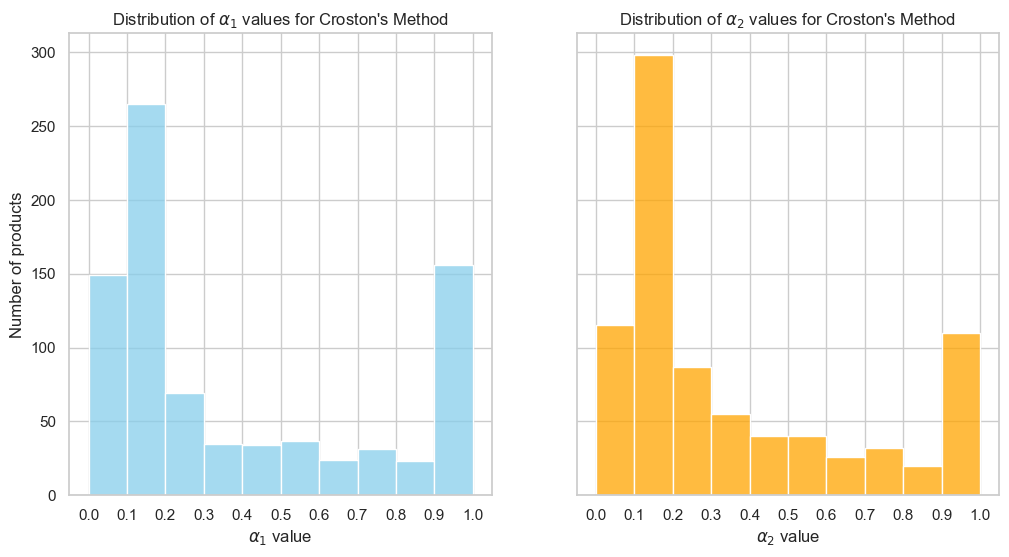

In [184]:
import seaborn as sns
sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(best_a_1, bins=10, color='skyblue', ax=axes[0])
sns.histplot(best_a_2, bins=10, color='orange', ax=axes[1])

axes[0].set_title('Distribution of $\\alpha_{1}$ values for Croston\'s Method')
axes[0].set_xlabel('$\\alpha_{1}$ value')
axes[0].set_ylabel('Number of products')
axes[0].set_xticks(np.unique(best_a_1))

axes[1].set_title('Distribution of $\\alpha_{2}$ values for Croston\'s Method')
axes[1].set_xlabel('$\\alpha_{2}$ value')
axes[1].set_xticks(np.unique(best_a_2))

plt.show()

# Cross-Validation and Evaluation of Croston TSB Method

In [60]:
_, best_a, best_b = runCrostonTSBVal(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3)

_ = tsbrmsePerFold(X_train_1, y_test_1, X_train_2, y_test_2, X_train_3, y_test_3, best_a, best_b)

Average RMSE:  1.6838543221103341
Average RMSE (Fold 1):  1.6164093166698728
Average RMSE (Fold 2):  1.670602786808612
Average RMSE (Fold 3):  1.7645508628525097


# Plot of the distribution of values of $\alpha$ and $\beta$

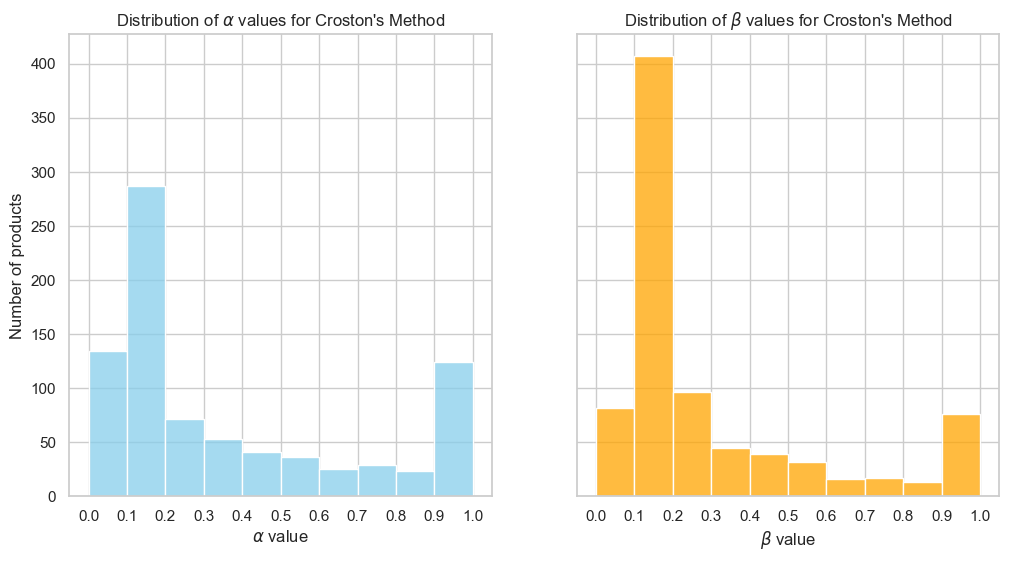

In [209]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(best_a, bins=10, color='skyblue', ax=axes[0])
sns.histplot(best_b, bins=10, color='orange', ax=axes[1])

axes[0].set_title('Distribution of $\\alpha}$ values for Croston\'s Method')
axes[0].set_xlabel('$\\alpha}$ value')
axes[0].set_ylabel('Number of products')
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

axes[1].set_title('Distribution of $\\beta$ values for Croston\'s Method')
axes[1].set_xlabel('$\\beta}$ value')
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Dataset creation for the Test Set

In [66]:
X_train_final = []
y_test = []

for product in products_all:
    x = product.iloc[:, -2]
    if not x.empty:
        X_train_final.append(x)
    else:
        X_train_final.append(pd.Series([]))

for productt in products_all_test:
    y = productt.iloc[:, -2]
    y_test.append(y)

# Test set forecasting using Croston TSB Method

In [75]:
rmses = []
preds = []
for i in range(len(X_train_final)):
    a = best_a[i]
    b = best_b[i]

    pred = Croston_TSB(X_train_final[i], len(y_test[i]), a, b)
    preds.append(pred[-len(y_test[i]):])
    rmse = np.sqrt(mean_squared_error(y_test[i], pred[-len(y_test[i]):]))
    rmses.append(rmse)
                    

print("Average RMSE (Test Set): ", sum(rmses)/len(rmses))


Average RMSE (Test Set):  1.973983125297656


## Prediction CSV file creation

In [105]:
final_predictions = test_df.copy()

In [106]:
for index, row in final_predictions.iterrows():
    for j in range(len(preds[index])):
        final_predictions.iloc[index, j+1] = preds[index][j]

In [109]:
final_predictions.to_csv('sales_test_validation_afcs2023.csv', index=False)